## Problem Set 3
### MACS 30200
### Leoson Hoay

**Importing necessary packages:**

In [31]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import random
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [32]:
random.seed(1234)

In [33]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [34]:
# reshape into 2D tensor
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
# standardize to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [35]:
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [36]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

model = baseline_model()

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=512, verbose=2)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
 - 13s - loss: 0.4605 - acc: 0.8610 - val_loss: 0.1505 - val_acc: 0.9532
Epoch 2/200
 - 10s - loss: 0.1305 - acc: 0.9608 - val_loss: 0.1326 - val_acc: 0.9594
Epoch 3/200
 - 9s - loss: 0.0779 - acc: 0.9761 - val_loss: 0.1309 - val_acc: 0.9663
Epoch 4/200
 - 9s - loss: 0.0549 - acc: 0.9838 - val_loss: 0.0710 - val_acc: 0.9802
Epoch 5/200
 - 8s - loss: 0.0389 - acc: 0.9880 - val_loss: 0.0920 - val_acc: 0.9759
Epoch 6/200
 - 9s - loss: 0.0324 - acc: 0.9905 - val_loss: 0.1007 - val_acc: 0.9754
Epoch 7/200
 - 9s - loss: 0.0223 - acc: 0.9932 - val_loss: 0.1015 - val_acc: 0.9775
Epoch 8/200
 - 9s - loss: 0.0209 - acc: 0.9939 - val_loss: 0.1115 - val_acc: 0.9778
Epoch 9/200
 - 9s - loss: 0.0171 - acc: 0.9946 - val_loss: 0.1182 - val_acc: 0.9776
Epoch 10/200
 - 9s - loss: 0.0159 - acc: 0.9957 - val_loss: 0.1029 - val_acc: 0.9818
Epoch 11/200
 - 9s - loss: 0.0176 - acc: 0.9954 - val_loss: 0.0961 - val_acc: 0.9814
Epoch 12/200
 - 9s - l

Epoch 97/200
 - 9s - loss: 0.0079 - acc: 0.9992 - val_loss: 0.1828 - val_acc: 0.9837
Epoch 98/200
 - 9s - loss: 0.0132 - acc: 0.9986 - val_loss: 0.2028 - val_acc: 0.9816
Epoch 99/200
 - 9s - loss: 0.0074 - acc: 0.9992 - val_loss: 0.2061 - val_acc: 0.9810
Epoch 100/200
 - 9s - loss: 0.0084 - acc: 0.9987 - val_loss: 0.1771 - val_acc: 0.9811
Epoch 101/200
 - 9s - loss: 0.0074 - acc: 0.9992 - val_loss: 0.1926 - val_acc: 0.9805
Epoch 102/200
 - 9s - loss: 0.0077 - acc: 0.9989 - val_loss: 0.1875 - val_acc: 0.9799
Epoch 103/200
 - 9s - loss: 0.0072 - acc: 0.9990 - val_loss: 0.1879 - val_acc: 0.9829
Epoch 104/200
 - 9s - loss: 0.0039 - acc: 0.9995 - val_loss: 0.2053 - val_acc: 0.9808
Epoch 105/200
 - 9s - loss: 0.0021 - acc: 0.9997 - val_loss: 0.2382 - val_acc: 0.9808
Epoch 106/200
 - 9s - loss: 0.0084 - acc: 0.9990 - val_loss: 0.2337 - val_acc: 0.9797
Epoch 107/200
 - 9s - loss: 0.0080 - acc: 0.9990 - val_loss: 0.2111 - val_acc: 0.9818
Epoch 108/200
 - 9s - loss: 0.0060 - acc: 0.9993 - val_lo

Epoch 193/200
 - 6s - loss: 0.0130 - acc: 0.9988 - val_loss: 0.2439 - val_acc: 0.9819
Epoch 194/200
 - 6s - loss: 0.0088 - acc: 0.9993 - val_loss: 0.2431 - val_acc: 0.9824
Epoch 195/200
 - 6s - loss: 0.0096 - acc: 0.9992 - val_loss: 0.2342 - val_acc: 0.9816
Epoch 196/200
 - 6s - loss: 0.0098 - acc: 0.9991 - val_loss: 0.2359 - val_acc: 0.9822
Epoch 197/200
 - 6s - loss: 0.0118 - acc: 0.9989 - val_loss: 0.2761 - val_acc: 0.9793
Epoch 198/200
 - 6s - loss: 0.0103 - acc: 0.9989 - val_loss: 0.2169 - val_acc: 0.9825
Epoch 199/200
 - 6s - loss: 0.0051 - acc: 0.9994 - val_loss: 0.2341 - val_acc: 0.9815
Epoch 200/200
 - 6s - loss: 0.0042 - acc: 0.9996 - val_loss: 0.2276 - val_acc: 0.9814
Baseline Error: 1.86%


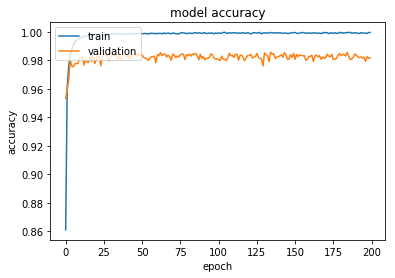

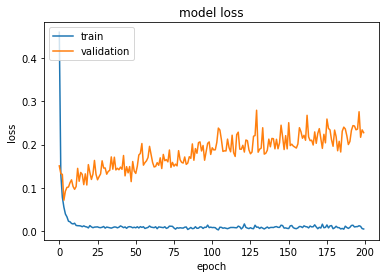

In [39]:
# Accuracy plot
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()